# AV2

![alt text](image-2.png)

![alt text](image.png)

Nesse codigo foram feitos duas versoes, uma versao calculando o tempo iterativamente e outra igualando ambas as distribuicoes

Tempo de colisao:  0.6760547453113835


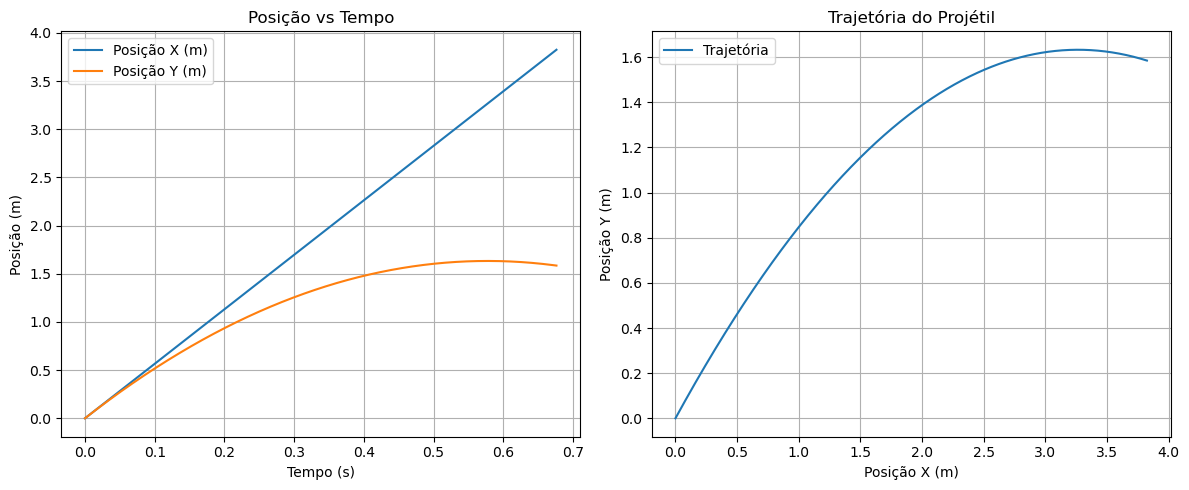

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def eval_y1(t, phi, vx):
    """
    Calcula a altura do plano inclinado no tempo t
    Equação: y = tan(φ) * vx * t (linha reta do plano inclinado)
    """
    return np.tan(phi) * vx * t

def eval_y2(t, vy, g):
    """
    Calcula a altura do projétil no tempo t
    Equação: y = vy * t - (g * t²)/2 (parábola do projétil)
    """
    return vy * t - g * t**2 / 2

def general_eval(theta: float, phi: float, v0: float, random_initializer=42):
    """
    Calcula a trajetória do projétil até encontrar o ponto de interseção com o plano inclinado
    
    Parâmetros:
    theta: Ângulo de lançamento em relação à horizontal (radianos)
    phi: Ângulo de inclinação do plano (radianos)
    v0: Velocidade inicial (m/s)
    random_initializer: Valor inicial para o tempo máximo (default=42)
    
    Retorna:
    tuple: (array x, array y, array t) - posições e tempos calculados
    """
    g = 9.8  # Aceleração da gravidade (m/s²)
    
    # Componentes da velocidade inicial
    vy0 = v0 * np.sin(theta)  # Componente vertical
    vx = v0 * np.cos(theta)   # Componente horizontal
    
    max_t = random_initializer  # Tempo máximo inicial
    found_t = True             # Flag para controle do loop
    numerator = 2              # Fator de ajuste do tempo
    check = ['']               # Lista para verificar mudanças
    
    # Loop para encontrar o tempo de interseção
    while found_t:
        # Calcula as alturas no tempo max_t
        y1 = eval_y1(max_t, phi, vx)  # Altura do plano
        y2 = eval_y2(max_t, vy0, g)   # Altura do projétil
        
        # Ajusta o numerator se a direção da busca mudou
        if len(check) > 2 and check[-1] != check[-2]:
            numerator /= 2
        
        # Garante que numerator não fique muito pequeno
        if numerator <= 1:
            numerator = 2 * numerator - numerator / 2
        
        # Verifica se encontrou o ponto de interseção
        if np.round(y1, 2) == np.round(y2, 2):
            found_t = False  # Condição de parada
        elif np.round(y1, 2) > np.round(y2, 2):
            max_t /= numerator  # Reduz o tempo máximo
            check.append('plus')
        else:
            max_t *= numerator  # Aumenta o tempo máximo
            check.append('minus')

    print("Tempo de colisao: ", max_t)
    
    # Cria array de tempos até max_t
    t = np.linspace(0, max_t, 1000)
    
    # Calcula as posições x e y
    x = vx * t                # Posição horizontal
    y = eval_y2(t, vy0, g)    # Posição vertical
    
    return x, y, t

def plot(x, y, t, label_x, label_y, title):
    """
    Plota os gráficos das posições x e y em função do tempo
    
    Parâmetros:
    x: Array de posições horizontais
    y: Array de posições verticais
    t: Array de tempos
    label_x: Rótulo do eixo x
    label_y: Rótulo do eixo y
    title: Título do gráfico
    """
    plt.figure(figsize=(12, 5))
    
    # Gráfico 1: Posições X e Y em função do tempo
    plt.subplot(1, 2, 1)
    plt.plot(t, x, label='Posição X (m)')
    plt.plot(t, y, label='Posição Y (m)')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Posição (m)')
    plt.title('Posição vs Tempo')
    plt.legend()
    plt.grid(True)

    # Gráfico 2: Trajetória no plano XY
    plt.subplot(1, 2, 2)
    plt.plot(x, y, label='Trajetória')
    plt.xlabel('Posição X (m)')
    plt.ylabel('Posição Y (m)')
    plt.title('Trajetória do Projétil')
    plt.legend()
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()


# Ângulo de lançamento: π/4 (45°), Ângulo do plano: π/8 (22.5°), Velocidade: 8 m/s
x, y, t = general_eval(np.pi/4, np.pi/8, 8)

# Plotagem dos resultados
plot(x, y, t, 'Tempo', 'Posição', 'Posição (X & Y) pelo tempo')

Tempo de colisao:  0.6762670406091348


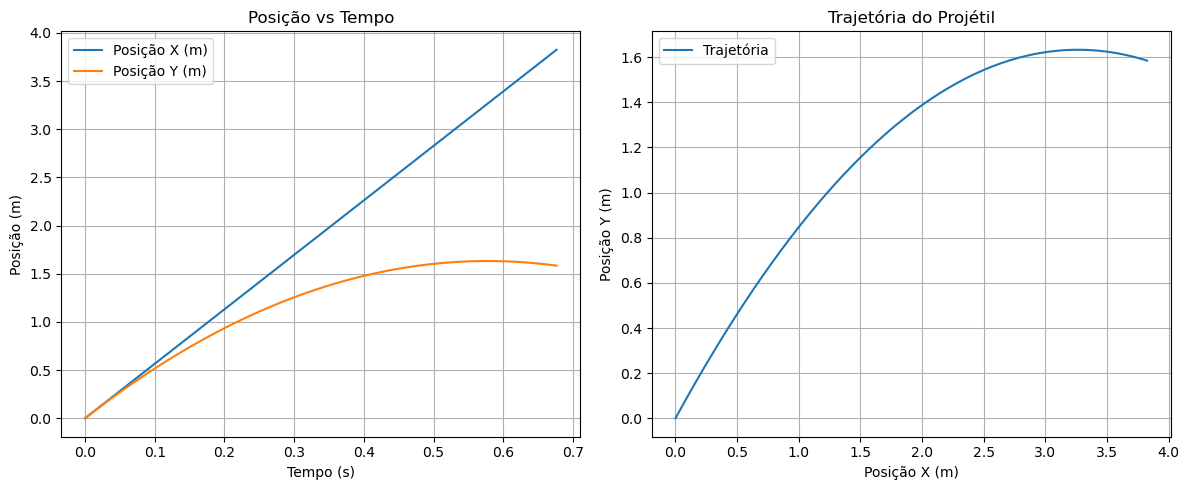

In [31]:

def exact_eval(theta: float, phi: float, v0: float):
    """
    Calcula a trajetória de um projétil disparado em um plano inclinado
    
    Parâmetros:
    theta (float): Ângulo de lançamento em relação à horizontal (radianos)
    phi (float): Ângulo de inclinação do plano (radianos)
    v0 (float): Velocidade inicial (m/s)
    
    Retorna:
    tuple: (array x, array y, array t)
    """
    g = 9.8  # aceleração da gravidade
    
    # Componentes da velocidade inicial
    vx = v0 * np.cos(theta)  # componente horizontal
    vy = v0 * np.sin(theta)  # componente vertical
    
    # Tempo de voo - quando o projétil atinge o plano inclinado (y1 = y2)
    # Resolvendo: tan(phi)*vx*t = vy*t - 0.5*g*t²
    # Equação do 2º grau: 0.5*g*t² + (tan(phi)*vx - vy)*t = 0
    a = 0.5 * g
    b = np.tan(phi) * vx - vy
    
    # Tempos possíveis (soluções da equação quadrática)
    t1 = 0  # tempo inicial
    t2 = -b / a  # tempo quando o projétil atinge o plano

    print("Tempo de colisao: ", t2)
    
    if t2 <= 0:
        raise ValueError("O projétil nunca atinge o plano inclinado com os parâmetros fornecidos")
    
    # Criar array de tempos
    t = np.linspace(0, t2, 1000)
    
    # Calcular posições
    x = vx * t  # posição horizontal
    y = vy * t - 0.5 * g * t**2  # posição vertical
    
    return x, y, t


x, y, t = exact_eval(np.pi/4, np.pi/8, 8)
plot(x, y, t, 'Tempo', 'Posição', 'Posição (X & Y) pelo tempo')
